In [407]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [408]:
directory = '/kaggle/input/ibm-hr-analytics-attrition-dataset'
file_path = '/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [409]:
df = pd.read_csv(file_path)

In [410]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [411]:
pd.set_option('display.max_columns', None)

## Table of Contents
- [Primary Goal](#Primary-Goal)
- [Data Exploration](#Data-Exploration)
    - [Gender](#Gender)
    - [Age](#Age)
    - [Department](#Department)
    -[Distance from home](#Distance-from-home)
    -[Environment Satisfaction](#Environment-Satisfaction)
    -[Job Satisfaction](#Job-Satisfaction)
    -[Overtime](#Overtime)
    -[Education](#Education)
    -[Income](#Income)
- [Importance of indicators check](#Importance-of-indicators-check)
    - [Correlogram Employee attrition](#Correlogram-Employee-attrition)
    - [Importance of indicators using XGBOOST](#Importance-of-indicators-using-XGBOOST)
        - [RESULT](#RESULT)
        -[Recomendation for the company](#Recomendation-for-the-company)       
- [PREDICTION OF ATTRITION ML](#PREDICTION-OF-ATTRITION-ML)
    - [Cleaning](#Cleaning)
    - [Ml Model](#ML-Model)
    - [Checking the accuracy manualy](#Checking-the-accuracy-manualy)
    


In [412]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Primary Goal


To understand the factors influencing employee attrition and performance within the company, and to identify actionable insights that can help reduce turnover and improve employee satisfaction and productivity.

# Data Exploration

In [414]:
# Count the number of employees by label
num_left = df[df['Attrition'] == 'Yes'].shape[0]
num_stay = df[df['Attrition']=='No'].shape[0]

print(f"Number of employees who left the company: {num_left}")
print(f"Number of employees who stayed: {num_stay}")

Number of employees who left the company: 237
Number of employees who stayed: 1233


Let's plot these numbers

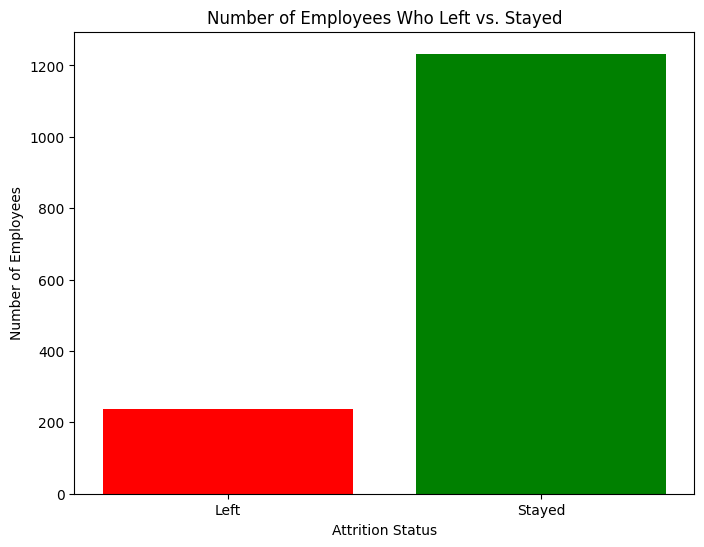

In [415]:
# Data for plotting
attrition_counts = [num_left, num_stay]
labels = ['Left', 'Stayed']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, attrition_counts, color=['red', 'green'])

# Add title and labels
plt.title('Number of Employees Who Left vs. Stayed')
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')

# Show the plot
plt.show()


## Gender

We need to see
 - The whole number of men and women
 - How many of them left and stayed
 - Make a conclusion about whether there is any correlation between these factors

 

In [416]:
fem_count = df[df['Gender'] == 'Female'].shape[0]
male_count = df[df['Gender'] == 'Male'].shape[0]

print(f'Total female number: {fem_count}')
print(f'Total male number: {male_count}')

Total female number: 588
Total male number: 882


In [417]:
fem_left = df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')].shape[0]
male_left = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')].shape[0]

print(f'Total female number left: {fem_left}')
print(f'Total male number left: {male_left}')

Total female number left: 87
Total male number left: 150


In [418]:
fem_left_per = (fem_left * 100)/fem_count
male_left_per = (male_left * 100)/male_count

print(f'Percent of women who left: {fem_left_per}')
print(f'Percent of men who left: {male_left_per}')

Percent of women who left: 14.795918367346939
Percent of men who left: 17.006802721088434


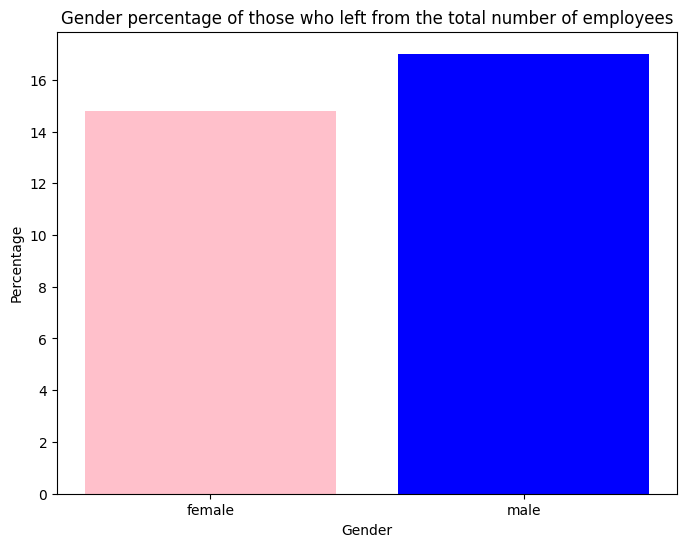

In [419]:
gender_counts = [fem_left_per, male_left_per]
labels = ['female', 'male']

plt.figure(figsize=(8, 6))
plt.bar(labels, gender_counts, color=['pink', 'blue'])

plt.title('Gender percentage of those who left from the total number of employees')
plt.xlabel('Gender')
plt.ylabel('Percentage')

plt.show()

There are no significant differences between the attrition of women and men.

## Age

In [420]:
age_range = sorted(df['Age'].unique())

In [421]:
print(f'Age range is: {age_range}')

Age range is: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


So our age range is from 18 to 60

In [422]:
age_counts = df.groupby('Age').size().reset_index(name='People_Count')

In [423]:
age_counts.head()

,Age,People_Count
0,18,8
1,19,9
2,20,11
3,21,13
4,22,16


In [424]:
age_counts_sorted = age_counts.sort_values(by='People_Count', ascending=False)

In [425]:
age_counts_sorted.head()

,Age,People_Count
17,35,78
16,34,77
18,36,69
13,31,69
11,29,68


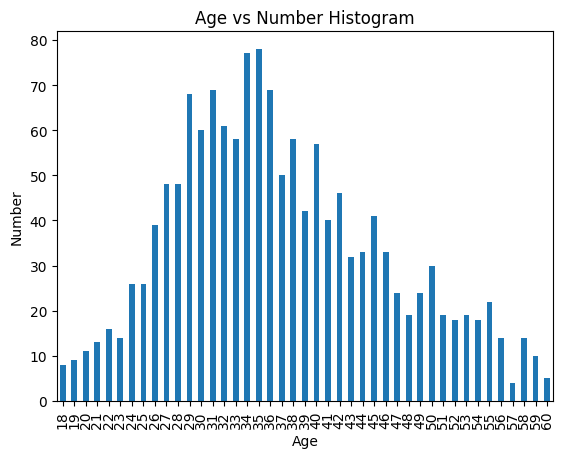

In [426]:
age_counts.plot(kind='bar', x='Age', y='People_Count', legend=False)

plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Age vs Number Histogram')

plt.show()

So, there are more people within the 29-40 age range in the company. Now we should check if attrition depends on the age of the employees.

It would be better to split the people into age groups to analyze this. 
We have an age range from 18 to 60, with more people in the 29 to 40 range.


I have created the following age group divisions:

- 18-23
- 24-28
- 29-32
- 33-36
- 37-40
- 41-45
- 46-50
- 51-55
- 56-60

In [427]:
age_ranges = [(18, 23), (24, 28), (29, 32), (33, 36), (37, 40), (41, 45), (46, 50), (51, 55), (56, 60)]
ages_groups = {}

for age_range in age_ranges:
    lower, upper = age_range
    variable_name = f'age_{lower}_{upper}' 
    ages_groups[variable_name] = df[(df['Age'] >= lower) & (df['Age'] <= upper)]

age_18_23 = ages_groups['age_18_23']
age_24_28 = ages_groups['age_24_28']
age_29_32 = ages_groups['age_29_32']
age_33_36 = ages_groups['age_33_36']
age_37_40 = ages_groups['age_37_40']
age_41_45 = ages_groups['age_41_45']
age_46_50 = ages_groups['age_46_50']
age_51_55 = ages_groups['age_51_55']
age_56_60 = ages_groups['age_56_60']


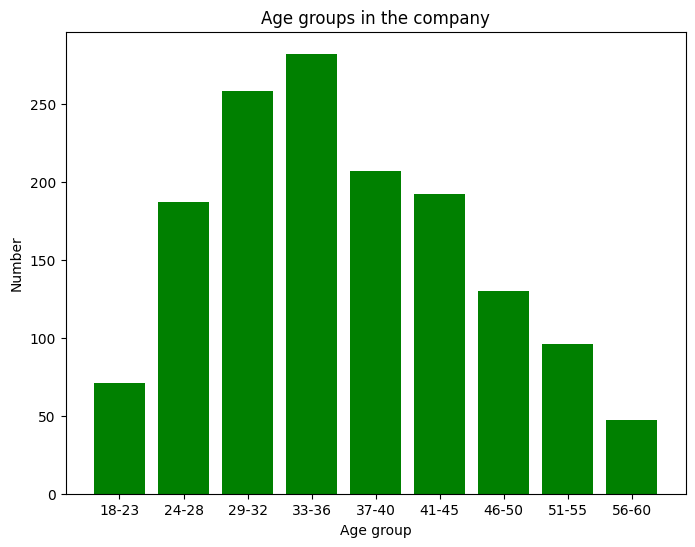

In [428]:
age_cats = [age_18_23.shape[0], age_24_28.shape[0], age_29_32.shape[0], 
              age_33_36.shape[0], age_37_40.shape[0], age_41_45.shape[0], 
              age_46_50.shape[0], age_51_55.shape[0], age_56_60.shape[0]]
labels = ['18-23', '24-28', '29-32', '33-36', '37-40', '41-45', '46-50','51-55', '56-60']

plt.figure(figsize=(8, 6))
plt.bar(labels, age_cats, color=['green'])

plt.title('Age groups in the company')
plt.xlabel('Age group')
plt.ylabel('Number')

plt.show()

In [429]:
age_ranges = [(18, 23), (24, 28), (29, 32), (33, 36), (37, 40), (41, 45), (46, 50), (51, 55), (56, 60)]
left_counts = {}

for age_range in age_ranges:
    lower, upper = age_range
    variable_name = f'left_{lower}_{upper}'  # Create the dynamic variable name
    left_counts[variable_name] = df[(df['Age'] >= lower) & (df['Age'] <= upper) & (df['Attrition'] == 'Yes')].shape[0]

left_18_23 = left_counts['left_18_23']
left_24_28 = left_counts['left_24_28']
left_29_32 = left_counts['left_29_32']
left_33_36 = left_counts['left_33_36']
left_37_40 = left_counts['left_37_40']
left_41_45 = left_counts['left_41_45']
left_46_50 = left_counts['left_46_50']
left_51_55 = left_counts['left_51_55']
left_56_60 = left_counts['left_56_60']


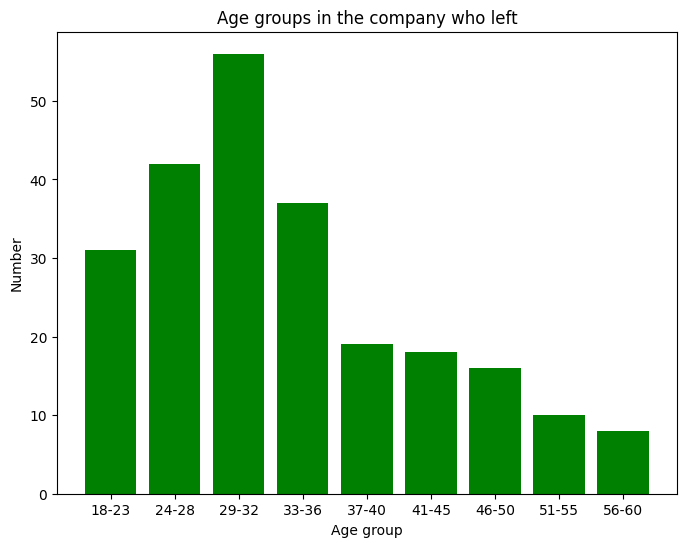

In [430]:
left_ages_cats = [left_18_23, left_24_28, left_29_32, left_33_36, left_37_40, left_41_45, left_46_50, left_51_55, left_56_60]
labels = ['18-23', '24-28', '29-32', '33-36', '37-40', '41-45', '46-50','51-55', '56-60']

plt.figure(figsize=(8, 6))
plt.bar(labels, left_ages_cats, color=['green'])

plt.title('Age groups in the company who left')
plt.xlabel('Age group')
plt.ylabel('Number')

plt.show()

We can see, that the distribution of those who left differs from the distribution of total employees. So, we need to look at the percentage of those who left in each age category.

In [431]:
left_percent = [left / total for left, total in zip(left_ages_cats, age_cats)]

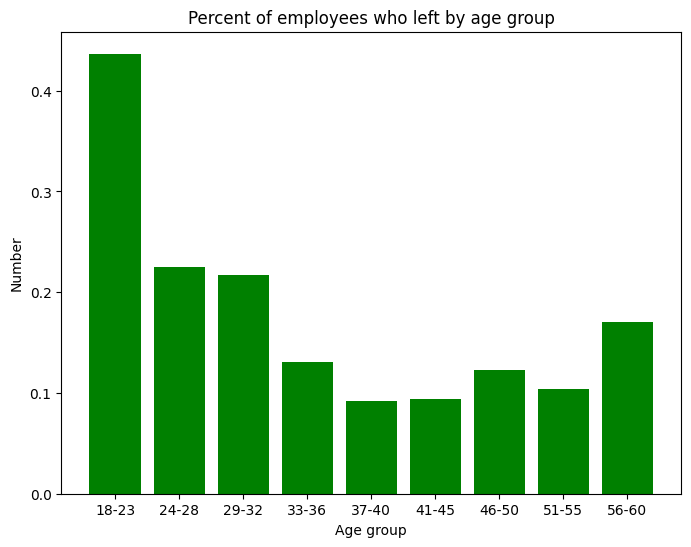

In [432]:
plt.figure(figsize=(8, 6))
plt.bar(labels, left_percent, color=['green'])

plt.title('Percent of employees who left by age group')
plt.xlabel('Age group')
plt.ylabel('Number')

plt.show()

The data reveals that while the highest number of employees who left the company were from the 29-32 age group, the highest percentage of departures occurred among the youngest employees, aged 18-23.

## Department


In [433]:
distinct_dep = df[['Department']].drop_duplicates().sort_values(by='Department')

In [434]:
distinct_dep

,Department
79,Human Resources
1,Research & Development
0,Sales


So we have only 3 departments in the company 

In [435]:
hr_count = df[df['Department'] == 'Human Resources'].shape[0]
rd_count = df[df['Department'] == 'Research & Development'].shape[0]
sl_count = df[df['Department'] == 'Sales'].shape[0]

leave_hr_count = df[(df['Department'] == 'Human Resources') & (df['Attrition'] == 'Yes')].shape[0]
leave_rd_count = df[(df['Department'] == 'Research & Development') & (df['Attrition'] == 'Yes')].shape[0]
leave_sl_count = df[(df['Department'] == 'Sales') & (df['Attrition'] == 'Yes')].shape[0]

# print(f'Number of people in each department is {hr_count} for HR department')
# print(f'Number of people in each department is {rd_count} for RD department')
# print(f'Number of people in each department is {sl_count} for Sales department')
# print('')
# print(f'Number of people from HR dep, who left: {leave_hr_count}')
# print(f'Number of people from RD dep, who left: {leave_rd_count}')
# print(f'Number of people from Sales dep, who left: {leave_sl_count}')

In [436]:
leave_hr_percentage = (leave_hr_count / hr_count) * 100
leave_rd_percentage = (leave_rd_count / rd_count) * 100
leave_sl_percentage = (leave_sl_count / sl_count) * 100

# print(f'Percentage of people who left from the HR department: {leave_hr_percentage:.2f}%')
# print(f'Percentage of people who left from the RD department: {leave_rd_percentage:.2f}%')
# print(f'Percentage of people who left from the Sales department: {leave_sl_percentage:.2f}%')

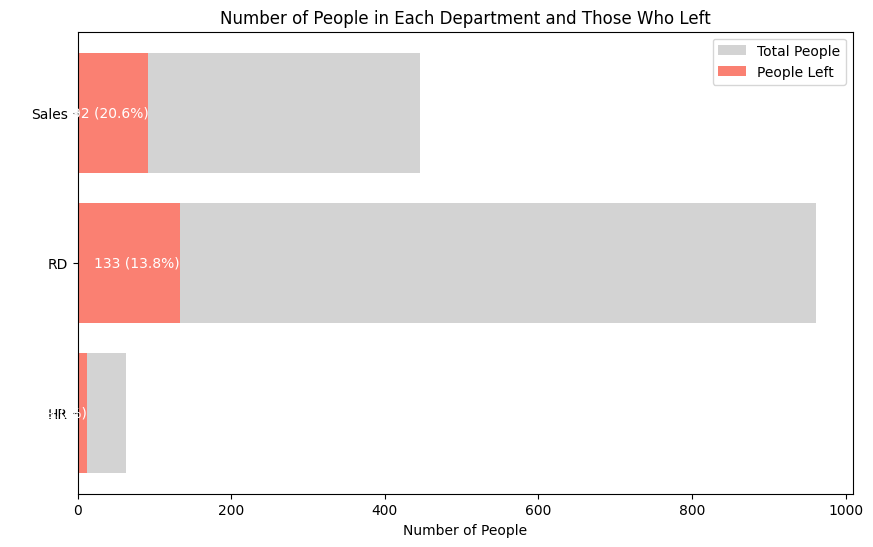

In [437]:
departments = ['HR', 'RD', 'Sales']
total_counts = [hr_count, rd_count, sl_count]
left_counts = [leave_hr_count, leave_rd_count, leave_sl_count]
stayed_counts = [total - left for total, left in zip(total_counts, left_counts)]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(departments, total_counts, color='lightgray', label='Total People')
bars_left = ax.barh(departments, left_counts, color='salmon', label='People Left')

for bar, left_count, total_count in zip(bars, left_counts, total_counts):
    width = bar.get_width()
    percentage = (left_count / total_count) * 100
    ax.text(width - (width - left_count), bar.get_y() + bar.get_height()/2, f'{left_count} ({percentage:.1f}%)', 
            va='center', ha='right', color='white', fontsize=10)

ax.set_xlabel('Number of People')
ax.set_title('Number of People in Each Department and Those Who Left')
ax.legend()

plt.show()


The highest attrition is in the Reserach and Development department

## Distance from home

In [438]:
# Sorting the 'DistanceFromHome' column
sorted_distances = df['DistanceFromHome'].sort_values()

distance_counts = df['DistanceFromHome'].value_counts().sort_index().reset_index()
distance_counts.columns = ['DistanceFromHome', 'People_Count']


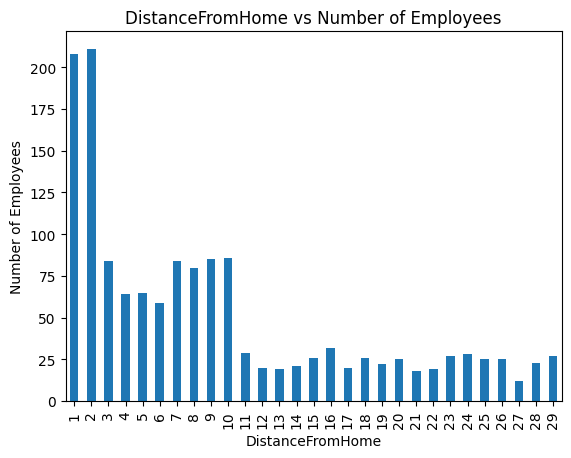

In [439]:
distance_counts.plot(kind='bar', x='DistanceFromHome', y='People_Count', legend=False)

plt.xlabel('DistanceFromHome')
plt.ylabel('Number of Employees')
plt.title('DistanceFromHome vs Number of Employees')

plt.show()

In [440]:
dist_ranges = [(1, 2), (3, 6), (7, 10), (11, 16), (17, 22), (23, 26), (27, 29)]
dist_groups = {}

for dist_range in dist_ranges:
    lower, upper = dist_range
    variable_name = f'dist_{lower}_{upper}' 
    dist_groups[variable_name] = df[(df['DistanceFromHome'] >= lower) & (df['DistanceFromHome'] <= upper)]

dist_1_2 = dist_groups['dist_1_2'].shape[0]
dist_3_6 = dist_groups['dist_3_6'].shape[0]
dist_7_10 = dist_groups['dist_7_10'].shape[0]
dist_11_16 = dist_groups['dist_11_16'].shape[0]
dist_17_22 = dist_groups['dist_17_22'].shape[0]
dist_23_26 = dist_groups['dist_23_26'].shape[0]
dist_27_29 = dist_groups['dist_27_29'].shape[0]

# print(f'Number of people who live on distance 1-2 km from workplace: {dist_1_2}')
# print(f'Number of people who live on distance 3-6 km from workplace: {dist_3_6}')
# print(f'Number of people who live on distance 7-10 km from workplace: {dist_7_10}')
# print(f'Number of people who live on distance 11-16 km from workplace: {dist_11_16}')
# print(f'Number of people who live on distance 17-22 km from workplace: {dist_17_22}')
# print(f'Number of people who live on distance 23-26 km from workplace: {dist_23_26}')
# print(f'Number of people who live on distance 27-29 km from workplace: {dist_27_29}')

In [441]:
dist_ranges = [(1, 2), (3, 6), (7, 10), (11, 16), (17, 22), (23, 26), (27, 29)]
dist_groups_left = {}

for dist_range in dist_ranges:
    lower, upper = dist_range
    variable_name = f'dist_{lower}_{upper}_left' 
    dist_groups_left[variable_name] = df[(df['DistanceFromHome'] >= lower) & 
                                         (df['DistanceFromHome'] <= upper) & 
                                         (df['Attrition'] == 'Yes')].shape[0]

dist_1_2_left = dist_groups_left['dist_1_2_left']
dist_3_6_left = dist_groups_left['dist_3_6_left']
dist_7_10_left = dist_groups_left['dist_7_10_left']
dist_11_16_left = dist_groups_left['dist_11_16_left']
dist_17_22_left = dist_groups_left['dist_17_22_left']
dist_23_26_left = dist_groups_left['dist_23_26_left']
dist_27_29_left = dist_groups_left['dist_27_29_left']

# print(f'Number of people who live on distance 1-2 km from workplace and left: {dist_1_2_left}')
# print(f'Number of people who live on distance 3-6 km from workplace and left: {dist_3_6_left}')
# print(f'Number of people who live on distance 7-10 km from workplace and left: {dist_7_10_left}')
# print(f'Number of people who live on distance 11-16 km from workplace and left: {dist_11_16_left}')
# print(f'Number of people who live on distance 17-22 km from workplace and left: {dist_17_22_left}')
# print(f'Number of people who live on distance 23-26 km from workplace and left: {dist_23_26_left}')
# print(f'Number of people who live on distance 27-29 km from workplace and left: {dist_27_29_left}')

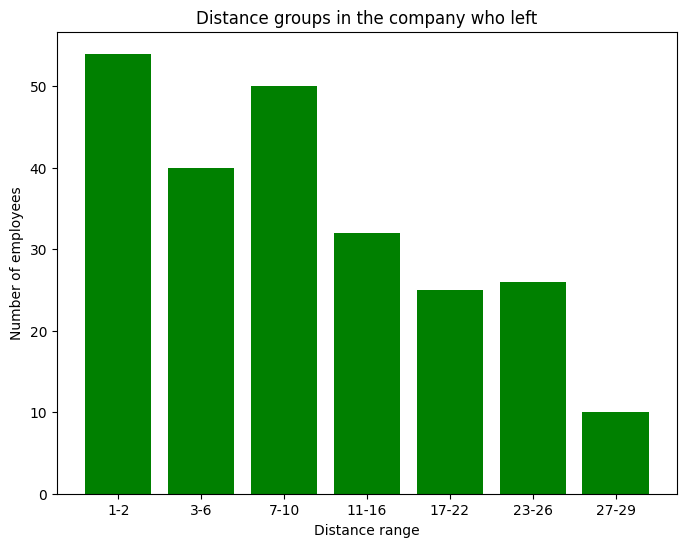

In [442]:
left_dist_cats = [dist_1_2_left, dist_3_6_left, dist_7_10_left, dist_11_16_left, dist_17_22_left, dist_23_26_left, dist_27_29_left ]
labels = ['1-2', '3-6', '7-10', '11-16', '17-22', '23-26', '27-29']

plt.figure(figsize=(8, 6))
plt.bar(labels, left_dist_cats, color=['green'])

plt.title('Distance groups in the company who left')
plt.xlabel('Distance range')
plt.ylabel('Number of employees')

plt.show()

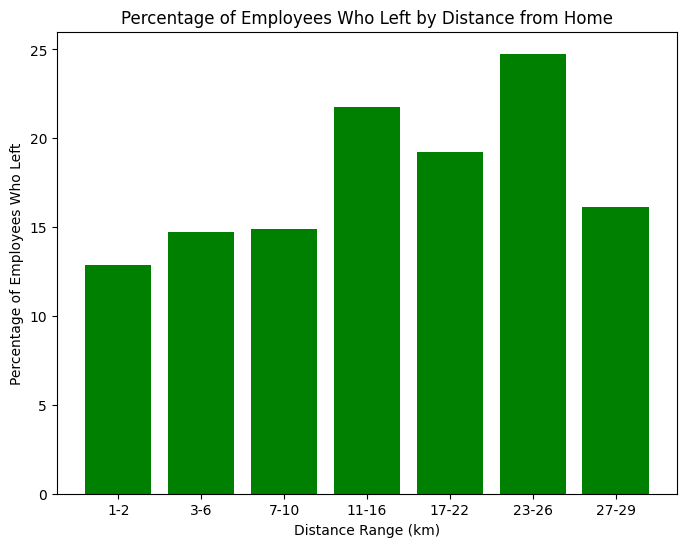

In [443]:
# Extracting total counts for each distance group
total_dist_cats = [dist_groups[f'dist_{lower}_{upper}'].shape[0] for lower, upper in dist_ranges]

# List of people who left in each distance range (already calculated in dist_groups_left)
left_dist_cats = [dist_1_2_left, dist_3_6_left, dist_7_10_left, dist_11_16_left, dist_17_22_left, dist_23_26_left, dist_27_29_left]

# Distance range labels for plotting
labels = ['1-2', '3-6', '7-10', '11-16', '17-22', '23-26', '27-29']

# The percentage of employees who left by distance group
dist_left_percent = [(left / total) * 100 if total != 0 else 0 for left, total in zip(left_dist_cats, total_dist_cats)]

plt.figure(figsize=(8, 6))
plt.bar(labels, dist_left_percent, color='green')

plt.title('Percentage of Employees Who Left by Distance from Home')
plt.xlabel('Distance Range (km)')
plt.ylabel('Percentage of Employees Who Left')

plt.show()


A noticeable trend is that people leave the company mostly among those who live further from work

## Environment Satisfaction

Now we should research one of the most important indicators - Environment Satisfaction

In [444]:
env_sat_list = df[['EnvironmentSatisfaction']].drop_duplicates().sort_values(by='EnvironmentSatisfaction')
env_sat_list

,EnvironmentSatisfaction
4,1
0,2
1,3
2,4


So 1 is the lowest satisfaction level and 4 is the highest satisfaction level

In [445]:
employee_amount = df['EmployeeNumber'].shape[0]

highest_env_sat = df[df['EnvironmentSatisfaction'] == 4].shape[0]
high_env_sat = df[df['EnvironmentSatisfaction'] == 3].shape[0]
middle_env_sat = df[df['EnvironmentSatisfaction'] == 2].shape[0]
low_env_sat = df[df['EnvironmentSatisfaction'] == 1].shape[0]

highest_env_sat_per = (highest_env_sat*100)/employee_amount
high_env_sat_per = (high_env_sat*100)/employee_amount
middle_env_sat_per = (middle_env_sat*100)/employee_amount
low_env_sat_per = (low_env_sat*100)/employee_amount

# print(f'Number of employees in the company: {employee_amount}')
# print(f'Percent of the most satisfied employees: {highest_env_sat_per:.2f}%')
# print(f'Percent of satisfied employees: {high_env_sat_per:.2f}%')
# print(f'Percent of the not so satisfied employees: {middle_env_sat_per:.2f}%')
# print(f'Percent of the most unsatisfied employees: {low_env_sat_per:.2f}%')

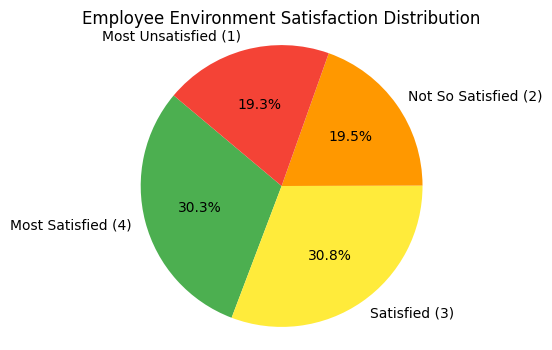

In [446]:
categories = ['Most Satisfied (4)', 'Satisfied (3)', 'Not So Satisfied (2)', 'Most Unsatisfied (1)']
percentages = [highest_env_sat_per, high_env_sat_per, middle_env_sat_per, low_env_sat_per]

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FFEB3B', '#FF9800', '#F44336'])
plt.title('Employee Environment Satisfaction Distribution')
plt.axis('equal')
plt.show()


In [447]:
highest_env_sat_left = df[(df['EnvironmentSatisfaction'] == 4) & (df['Attrition'] == 'Yes')].shape[0]
high_env_sat_left = df[(df['EnvironmentSatisfaction'] == 3) & (df['Attrition'] == 'Yes')].shape[0]
middle_env_sat_left = df[(df['EnvironmentSatisfaction'] == 2) & (df['Attrition'] == 'Yes')].shape[0]
low_env_sat_left = df[(df['EnvironmentSatisfaction'] == 1) & (df['Attrition'] == 'Yes')].shape[0]

highest_env_sat_left_per = (highest_env_sat_left*100)/highest_env_sat
high_env_sat_left_per = (high_env_sat_left*100)/high_env_sat
middle_env_sat_left_per = (middle_env_sat_left*100)/middle_env_sat
low_env_sat_left_per = (low_env_sat_left*100)/low_env_sat

# print(f'Percent of the most satisfied employees who left from the highest satisfaction group: {highest_env_sat_left_per:.2f}%')
# print(f'Percent of the quite satisfied employees who left from the high satisfaction group: {high_env_sat_left_per:.2f}%')
# print(f'Percent of the not so satisfied employees who left from the middle satisfaction group: {middle_env_sat_left_per:.2f}%')
# print(f'Percent of the most unsatisfied employees who left from the lowest satisfaction group: {low_env_sat_left_per:.2f}%')

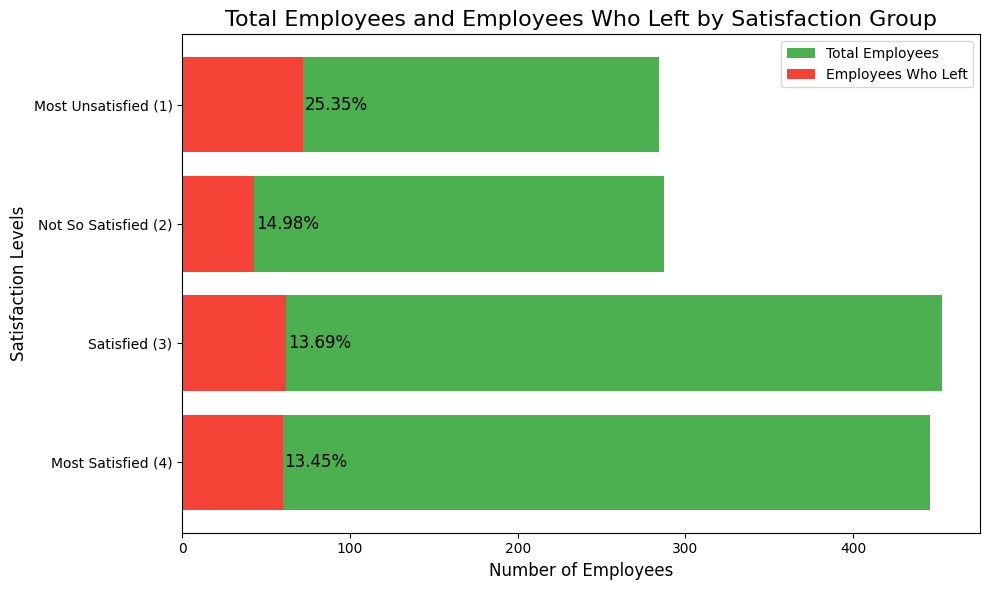

In [448]:
# Data for total employees in each satisfaction group
total_counts = [highest_env_sat, high_env_sat, middle_env_sat, low_env_sat]
satisfaction_groups = ['Most Satisfied (4)', 'Satisfied (3)', 'Not So Satisfied (2)', 'Most Unsatisfied (1)']

# Data for the number of people who left in each group
left_counts = [highest_env_sat_left, high_env_sat_left, middle_env_sat_left, low_env_sat_left]

# Bar chart with the total number of employees and overlay the number of people who left
fig, ax = plt.subplots(figsize=(10, 6))

# Total employees bars
bars = ax.barh(satisfaction_groups, total_counts, color='#4CAF50', label='Total Employees')

# Overlay bars for people who left
bars_left = ax.barh(satisfaction_groups, left_counts, color='#F44336', label='Employees Who Left')

# Chart title and labels
ax.set_title('Total Employees and Employees Who Left by Satisfaction Group', fontsize=16)
ax.set_xlabel('Number of Employees', fontsize=12)
ax.set_ylabel('Satisfaction Levels', fontsize=12)

# Adding thercentages inside the total bars
for i, (total, left) in enumerate(zip(total_counts, left_counts)):
    percentage = (left / total) * 100
    ax.text(left + 1, i, f'{percentage:.2f}%', va='center', ha='left', fontsize=12, color='black')

# Adding legend to explain colors
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Obviously, the highest attrition is in the group of the most unsatisfied people, but there are also not very significant differences, so even this may not be the biggest reason for the attrition.

## Job Satisfaction

Maybe the problem could be in Job Satisfaction,  Let's conduct the same research for this index.


In [449]:
highest_job_sat = df[df['JobSatisfaction'] == 4].shape[0]
high_job_sat = df[df['JobSatisfaction'] == 3].shape[0]
middle_job_sat = df[df['JobSatisfaction'] == 2].shape[0]
low_job_sat = df[df['JobSatisfaction'] == 1].shape[0]

highest_job_sat_per = (highest_job_sat*100)/employee_amount
high_job_sat_per = (high_job_sat*100)/employee_amount
middle_job_sat_per = (middle_job_sat*100)/employee_amount
low_job_sat_per = (low_job_sat*100)/employee_amount

# print(f'Number of employees in the company: {employee_amount}')
# print(f'Percent of the most satisfied employees with job overall: {highest_job_sat_per:.2f}%')
# print(f'Percent of quite satisfied employees with job overall: {high_job_sat_per:.2f}%')
# print(f'Percent of not so satisfied employees with job overall: {middle_job_sat_per:.2f}%')
# print(f'Percent of the most unsatisfied employees with job overall: {low_job_sat_per:.2f}%')

In [450]:
highest_job_sat_left = df[(df['JobSatisfaction'] == 4) & (df['Attrition'] == 'Yes')].shape[0]
high_job_sat_left = df[(df['JobSatisfaction'] == 3) & (df['Attrition'] == 'Yes')].shape[0]
middle_job_sat_left = df[(df['JobSatisfaction'] == 2) & (df['Attrition'] == 'Yes')].shape[0]
low_job_sat_left = df[(df['JobSatisfaction'] == 1) & (df['Attrition'] == 'Yes')].shape[0]

highest_job_sat_left_per = (highest_job_sat_left*100)/highest_job_sat
high_job_sat_left_per = (high_job_sat_left*100)/high_job_sat
middle_job_sat_left_per = (middle_job_sat_left*100)/middle_job_sat
low_job_sat_left_per = (low_job_sat_left*100)/low_job_sat

# print(f'Percent of the most satisfied employees who left from the highest Job satisfaction group: {highest_env_sat_left_per:.2f}%')
# print(f'Percent of the quite satisfied employees who left from the high Job satisfaction group: {high_env_sat_left_per:.2f}%')
# print(f'Percent of the not so satisfied employees who left from the middle Job satisfaction group: {middle_env_sat_left_per:.2f}%')
# print(f'Percent of the most unsatisfied employees who left from the lowest Job satisfaction group: {low_env_sat_left_per:.2f}%')

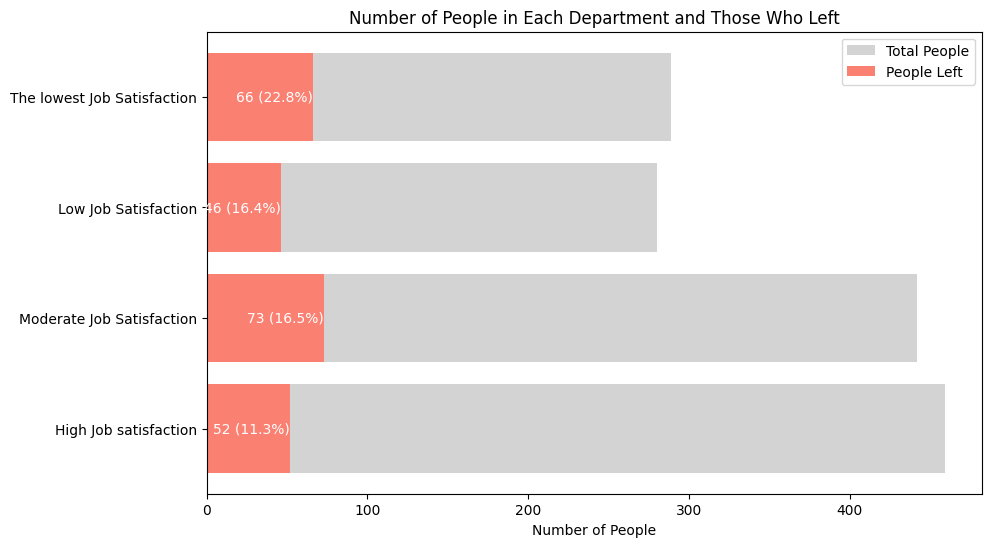

In [451]:
satisf_groups = ['High Job satisfaction', 'Moderate Job Satisfaction', 'Low Job Satisfaction', 'The lowest Job Satisfaction']
total_counts = [highest_job_sat, high_job_sat, middle_job_sat, low_job_sat]
left_counts = [highest_job_sat_left, high_job_sat_left, middle_job_sat_left, low_job_sat_left]
stayed_counts = [total - left for total, left in zip(total_counts, left_counts)]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(satisf_groups, total_counts, color='lightgray', label='Total People')
bars_left = ax.barh(satisf_groups, left_counts, color='salmon', label='People Left')

# Adding percentage labels
for bar, left_count, total_count in zip(bars, left_counts, total_counts):
    width = bar.get_width()
    percentage = (left_count / total_count) * 100
    ax.text(width - (width - left_count), bar.get_y() + bar.get_height()/2, f'{left_count} ({percentage:.1f}%)', 
            va='center', ha='right', color='white', fontsize=10)

ax.set_xlabel('Number of People')
ax.set_title('Number of People in Each Department and Those Who Left')
ax.legend()

plt.show()


As for the Satisfaction of Environment, the results were expected, but there are not significant enough differences to be the main reason for attrition.

## Overtime


Now we should check if overtime has any impact on our attrition.

In [452]:
overtime_leave = df[(df['OverTime'] == 'Yes') & (df['Attrition'] == 'Yes')].shape[0]
overtime_stay = df[(df['OverTime'] == 'Yes') & (df['Attrition'] == 'No')].shape[0]

overtime_leave_per = (overtime_leave*100)/employee_amount
overtime_stay_per =(overtime_stay*100)/ employee_amount

print(f'Percent of people who worked overtime and left: {overtime_leave_per:.2f}%')
print(f'Percent of people who worked overtime and stayed: {overtime_stay_per:.2f}%')     

Percent of people who worked overtime and left: 8.64%
Percent of people who worked overtime and stayed: 19.66%


From this, we can see that most people who work overtime prefer to stay, despite this condition.

In [453]:
total_overtime = df[df['OverTime'] == 'Yes'].shape[0]

total_overtime_leave_per = (overtime_leave*100)/total_overtime
total_overtime_stay_per = (overtime_stay*100)/total_overtime

# print(f'Percent of people who worked overtime and left from the entire amount of people who worked overtime: {total_overtime_leave_per:.2f}%')
# print(f'Percent of people who worked overtime and stayed from the entire amount of people who worked overtime: {total_overtime_stay_per:.2f}%') 

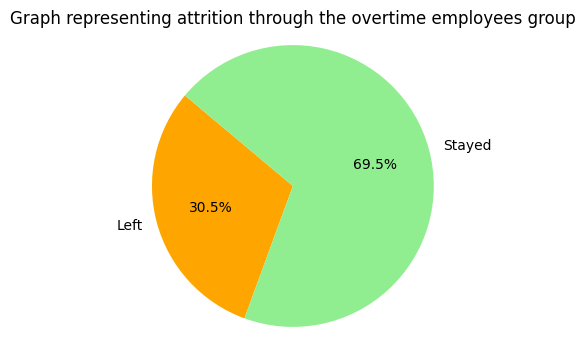

In [454]:
# Data for the chart
categories = ['Left', 'Stayed']
percentages = [total_overtime_leave_per, total_overtime_stay_per]

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=['orange', 'lightgreen'])
plt.title('Graph representing attrition through the overtime employees group')
plt.axis('equal')
plt.show()

Given the low attrition rate among employees who worked overtime, we might conclude that most were relatively satisfied with the longer working hours.

In [455]:
left_amount = df[df['Attrition'] == 'Yes'].shape[0]

left_overtime = df[(df['Attrition'] == 'Yes') & (df['OverTime'] == 'Yes')].shape[0]
left_not_overtime = df[(df['Attrition'] == 'Yes') & (df['OverTime'] == 'No')].shape[0]

left_overtime_per = (left_overtime*100)/left_amount
left_not_overtime_per =(left_not_overtime*100)/ left_amount

# print(f'Percent of Overtime working people from those who left: {left_overtime_per:.2f}%')
# print(f'Percent of people who didnt work Overtime from those who left: {left_not_overtime_per:.2f}%')     

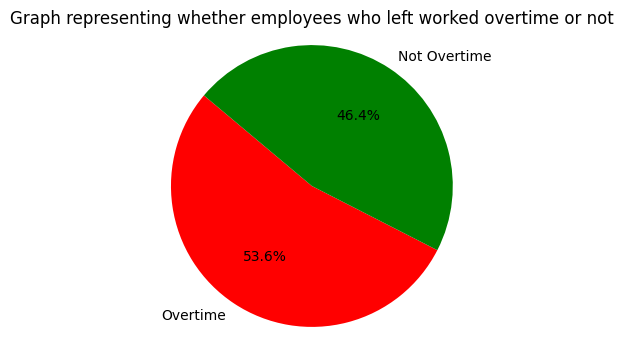

In [456]:
# Data for the chart
categories = ['Overtime', 'Not Overtime']
percentages = [left_overtime_per, left_not_overtime_per]

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Graph representing whether employees who left worked overtime or not')
plt.axis('equal')  # Ensures that the pie chart is drawn as a circle
plt.show()


The proportions of those who worked overtime and those who did not are almost equal.

## Education

In [457]:
sorted(df['Education'].unique())

[1, 2, 3, 4, 5]

In [458]:
education_levels = [1, 2, 3, 4, 5] 
education_counts = {} 

for level in education_levels:
    count = df[df['Education'] == level].shape[0]
    percentage = (count * 100) / employee_amount
    education_counts[level] = percentage

# Print the results
# for level, percentage in education_counts.items():
#     print(f'Percent of people in the company who have the {level} education level: {percentage:.2f}%')


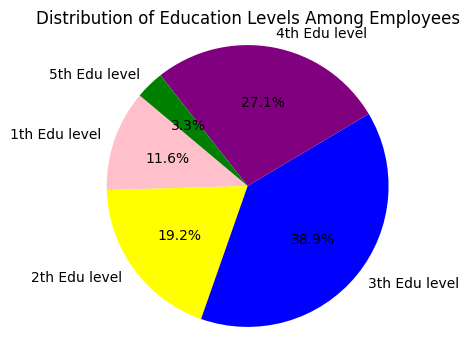

In [459]:
categories = [f'{level}th Edu level' for level in education_levels]  
percentages = [education_counts[level] for level in education_levels] 

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=['pink', 'yellow', 'blue', 'purple', 'green'])
plt.title('Distribution of Education Levels Among Employees')
plt.axis('equal') 
plt.show()


As we can see, the most common education level of employees is the 3rd level.

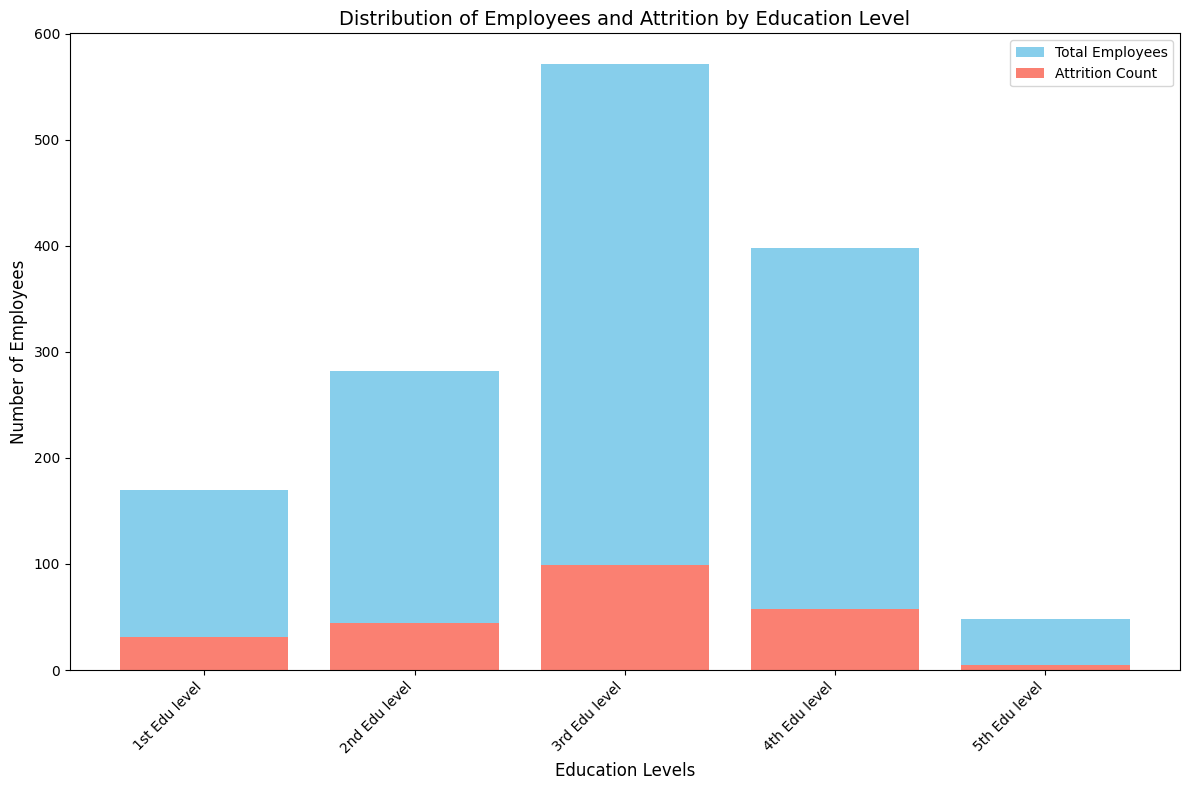

In [460]:
education_levels = [1, 2, 3, 4, 5]
education_counts = [] 
attrition_counts = [] 

for level in education_levels:
    total_count = df[df['Education'] == level].shape[0]  
    left_count = df[(df['Education'] == level) & (df['Attrition'] == 'Yes')].shape[0]
    
    education_counts.append(total_count)
    attrition_counts.append(left_count)

education_labels = ['1st Edu level', '2nd Edu level', '3rd Edu level', '4th Edu level', '5th Edu level']

# Bar chart
plt.figure(figsize=(12, 8))

# Bar positions
x = range(len(education_labels))

# Total number of employees
plt.bar(x, education_counts, color='skyblue', label='Total Employees')

# Number of employees who left
plt.bar(x, attrition_counts, color='salmon', label='Attrition Count')

# Adding labels and title
plt.title('Distribution of Employees and Attrition by Education Level', fontsize=14)
plt.xlabel('Education Levels', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(x, education_labels, rotation=45, ha='right')

# Adding legend
plt.legend()

plt.tight_layout()
plt.show()


The highest attrition rate is among employees with a 3rd level of education.

## Income

Now we should research employee income within the company

In [461]:
sorted(df['MonthlyIncome'].unique())
max_income = df['MonthlyIncome'].max()
min_income = df['MonthlyIncome'].min()

print(f' max income in the company is {max_income}')
print(f' min income in the company is {min_income}')


 max income in the company is 19999
 min income in the company is 1009


In [462]:
sorted_incomes = df['MonthlyIncome'].sort_values()

income_counts = df['MonthlyIncome'].value_counts().sort_index().reset_index()
income_counts.columns = ['MonthlyIncome', 'People_Count']

#print(income_counts)

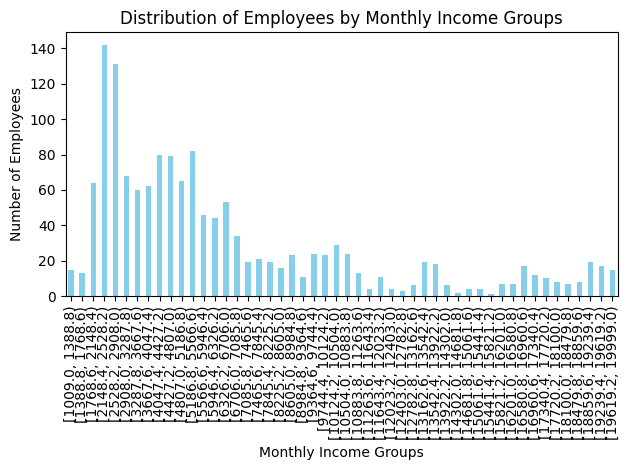

In [463]:
# Defining the minimum and maximum income for binning
min_income = 1009  
max_income = df['MonthlyIncome'].max()  

# Defining the number of bins (income groups)
num_bins = 50

# Bin edges using np.linspace to create 50 evenly spaced groups
bins = np.linspace(min_income, max_income, num_bins+1)

# Assigning each employee to a bin
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=bins, right=False)

# Nnumber of people in each income group
income_counts = df['IncomeGroup'].value_counts().sort_index()

# Plot the histogram as a bar chart
income_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Monthly Income Groups')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Monthly Income Groups')

plt.tight_layout()
plt.show()


Income groups into which employees can be divided
* 1009-1770
* 1771-3280
* 3281-5566
* 5567-7085
* 7086-11263
* 11264-14302
* 14303-16580
* 16581-18859
* 18860-1999

In [464]:
income_ranges = [1009, 1770, 3280, 5566, 7085, 11263, 14302, 16580, 18859, 19999]
income_labels = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th']

# Number of employees in each income group based on the ranges
income_counts = []
for i in range(len(income_ranges) - 1):
    count = df[(df['MonthlyIncome'] >= income_ranges[i]) & (df['MonthlyIncome'] < income_ranges[i + 1])].shape[0]
    income_counts.append(count)

# Print the results
# for label, count in zip(income_labels, income_counts):
#     print(f'Number of employees of the {label} income group: {count}')


In [465]:
# Calculate and print percentages for each income group
# for count, label in zip(income_counts, income_labels):
#     percentage = (count * 100) / employee_amount
#     print(f'Percentage of employees of the {label} income level: {percentage:.2f}%')


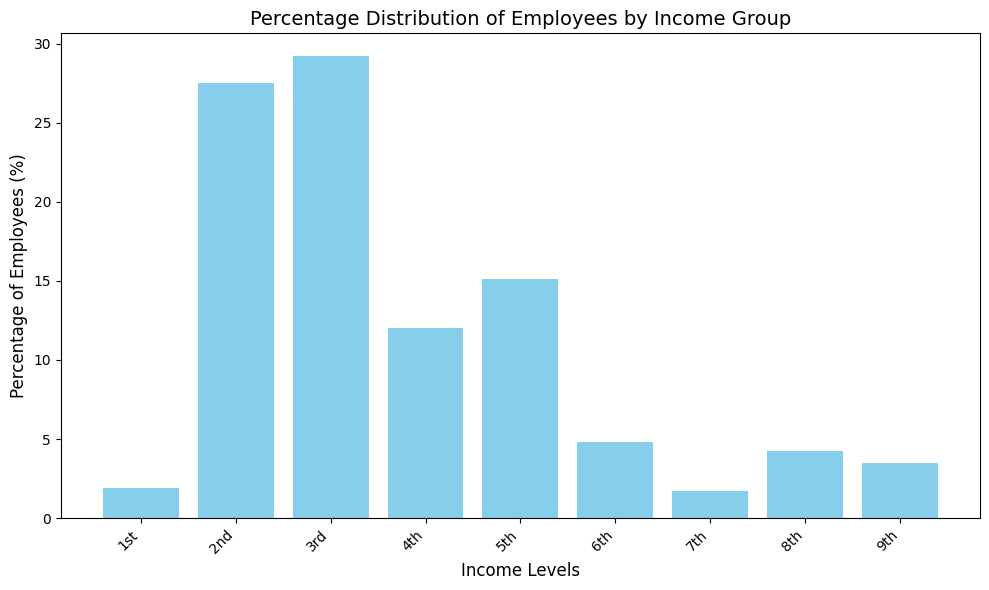

In [466]:
# Percentages of employees in each income group
income_percentages = [(count * 100) / employee_amount for count in income_counts]

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(income_labels, income_percentages, color='skyblue')

# Adding labels and title
plt.title('Percentage Distribution of Employees by Income Group', fontsize=14)
plt.xlabel('Income Levels', fontsize=12)
plt.ylabel('Percentage of Employees (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [467]:
income_ranges = [1009, 1770, 3280, 5566, 7085, 11263, 14302, 16580, 18859, 19999]
income_labels = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th']

# Number of employees and attrition percentages in each income group
income_counts = []  # Total employees in each income group
attrition_percentages = []  # Percentage of employees who left in each income group

for i in range(len(income_ranges) - 1):
    # Total number of employees in the income group
    total_count = df[(df['MonthlyIncome'] >= income_ranges[i]) & (df['MonthlyIncome'] < income_ranges[i + 1])].shape[0]
    
    # Number of employees who left in the income group
    left_count = df[(df['MonthlyIncome'] >= income_ranges[i]) & (df['MonthlyIncome'] < income_ranges[i + 1]) & (df['Attrition'] == 'Yes')].shape[0]
    
    income_counts.append(total_count)
    
    # Attrition percentage for this income group (handling division by zero)
    if total_count > 0:
        attrition_percentage = (left_count * 100) / total_count
    else:
        attrition_percentage = 0
    attrition_percentages.append(attrition_percentage)

# Print the results
# for label, total, attrition_perc in zip(income_labels, income_counts, attrition_percentages):
#     print(f'Income group {label}: Total Employees: {total}, Attrition Percentage: {attrition_perc:.2f}%')


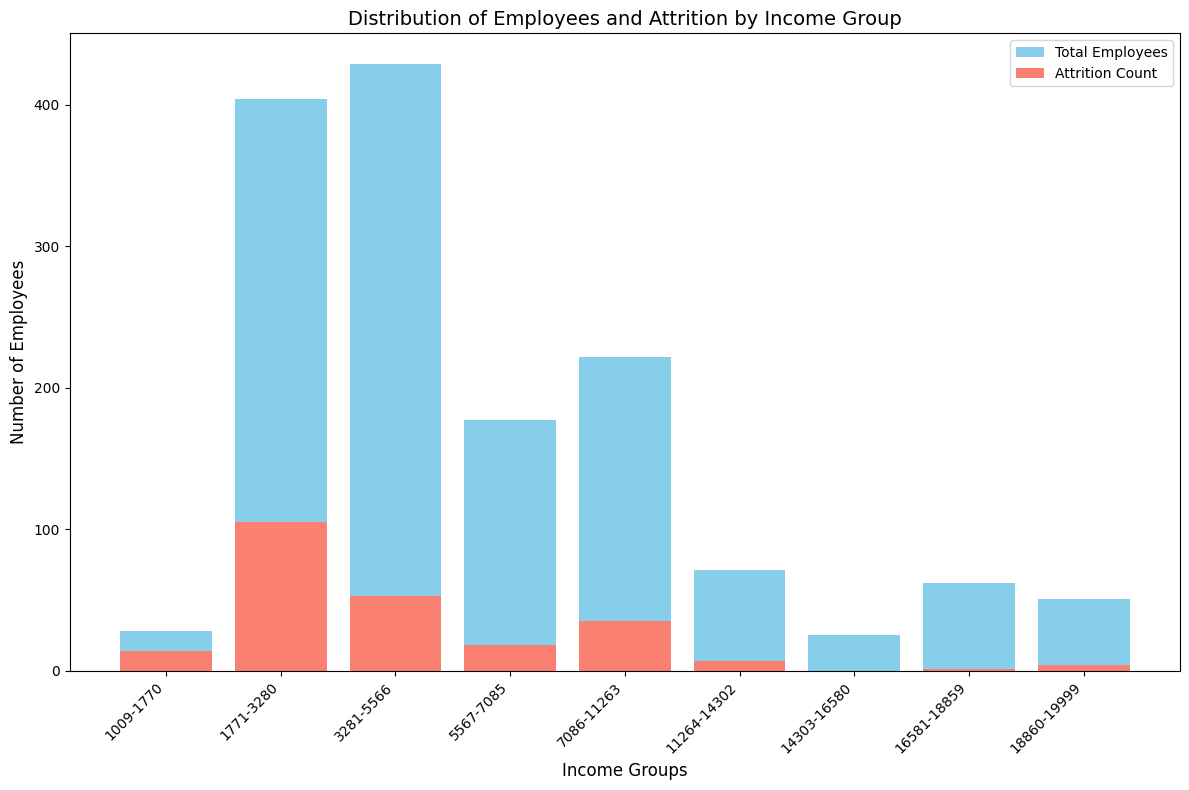

In [468]:
income_ranges = [1009, 1770, 3280, 5566, 7085, 11263, 14302, 16580, 18859, 19999]
income_labels = ['1009-1770', '1771-3280', '3281-5566', '5567-7085', '7086-11263', 
                 '11264-14302', '14303-16580', '16581-18859', '18860-19999']

income_counts = []
attrition_counts = []

for i in range(len(income_ranges) - 1):
    # Total number of employees in the income range
    total_count = df[(df['MonthlyIncome'] >= income_ranges[i]) & (df['MonthlyIncome'] < income_ranges[i + 1])].shape[0]
    
    # Number of employees who left in the income range
    left_count = df[(df['MonthlyIncome'] >= income_ranges[i]) & (df['MonthlyIncome'] < income_ranges[i + 1]) & (df['Attrition'] == 'Yes')].shape[0]
    
    income_counts.append(total_count)
    attrition_counts.append(left_count)

# Bar chart
plt.figure(figsize=(12, 8))

# Bar positions
x = range(len(income_labels))

# Total number of employees
plt.bar(x, income_counts, color='skyblue', label='Total Employees')

# Number of employees who left
plt.bar(x, attrition_counts, color='salmon', label='Attrition Count')

# Adding labels and title
plt.title('Distribution of Employees and Attrition by Income Group', fontsize=14)
plt.xlabel('Income Groups', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(x, income_labels, rotation=45, ha='right')

# Adding legend
plt.legend()

plt.tight_layout()
plt.show()


As anticipated, the highest attrition rates were observed in the lower income groups. Notably, there is a slight increase in attrition within the 18,860-19,999 income group. This higher attrition rate in the upper income bracket could potentially be attributed to retirement or other similar factors.

Lets check it out 

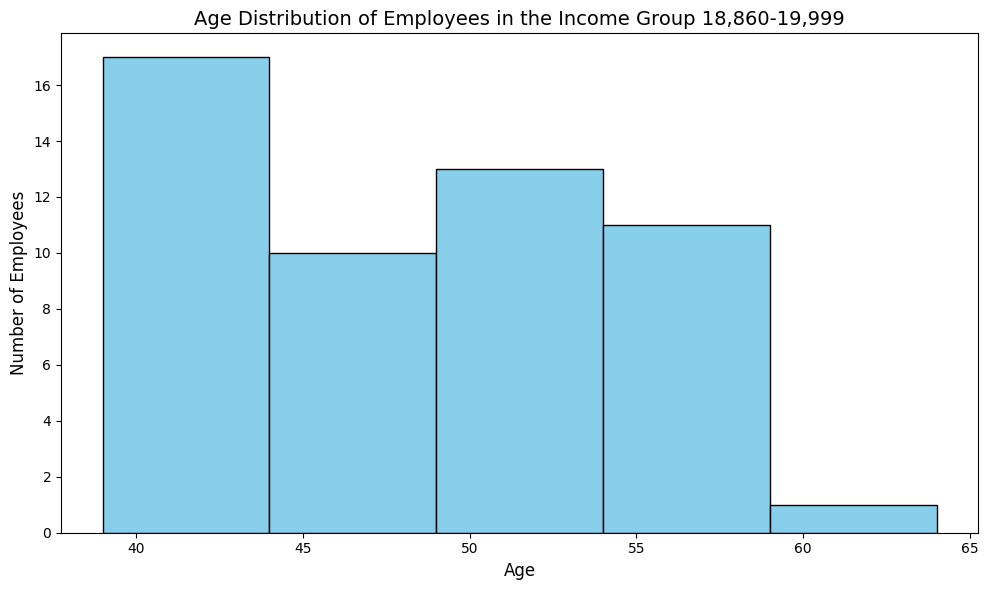

In [469]:
# Filtering the data for the income group 18,860-19,999
income_group = df[(df['MonthlyIncome'] >= 18860) & (df['MonthlyIncome'] <= 19999)]

# Extracting the ages of employees in this income group
ages = income_group['Age']

# Ploting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=range(int(ages.min()), int(ages.max()) + 5, 5), color='skyblue', edgecolor='black')

plt.title('Age Distribution of Employees in the Income Group 18,860-19,999', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

plt.tight_layout()
plt.show()


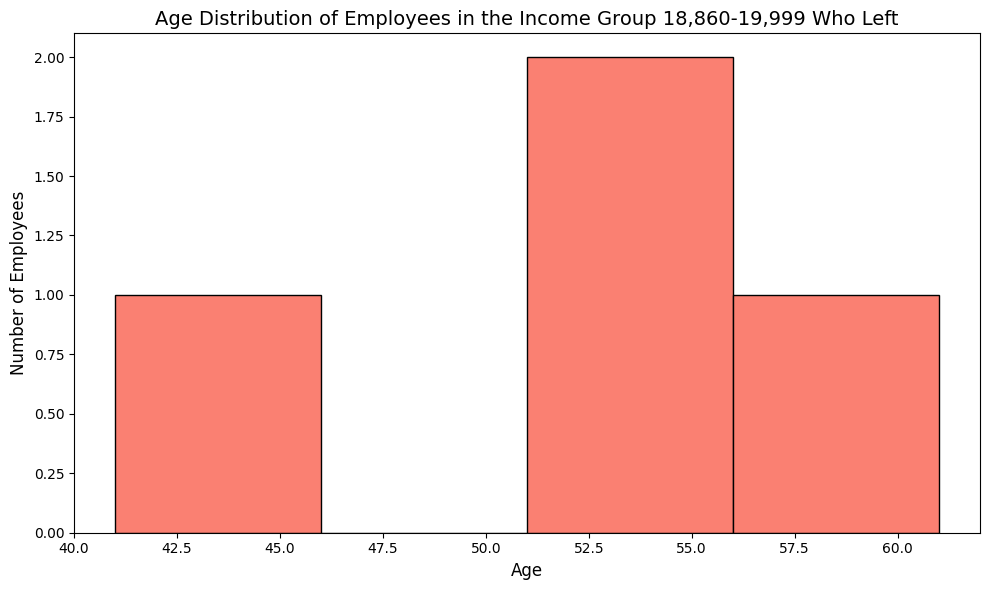

In [470]:
# Filtering the data for the income group 18,860-19,999 who have left
income_group_left = df[(df['MonthlyIncome'] >= 18860) & (df['MonthlyIncome'] <= 19999) & (df['Attrition'] == 'Yes')]

# Extracting the ages of employees in this income group who have left
ages_left = income_group_left['Age']

plt.figure(figsize=(10, 6))
plt.hist(ages_left, bins=range(int(ages_left.min()), int(ages_left.max()) + 5, 5), color='salmon', edgecolor='black')

plt.title('Age Distribution of Employees in the Income Group 18,860-19,999 Who Left', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

plt.tight_layout()
plt.show()


The data suggests that the increased attrition observed in the highest income group is likely influenced by retirement.

# Importance of indicators check

We will check such indicators as

- Age (young or not)
- How far from home (far or not)
- Education (high or not)
- Job Satisfaction (satisfied or not)
- Environment Satisfaction (satisfied or not)
- Monthly Income (high or not)
- Overtime (yes or no)

In [471]:
young = df[df['Age'] < 39].shape[0]
old = df[df['Age'] >= 39].shape[0]

close = df[df['DistanceFromHome'] <= 14].shape[0]
far = df[df['DistanceFromHome'] > 14].shape[0]

lower_ed_lev = df[df['Education']<= 3].shape[0]
higher_ed_lev = df[df['Education']> 3].shape[0]

job_sat = df[df['JobSatisfaction']<= 2].shape[0]
job_unsat = df[df['JobSatisfaction'] > 2].shape[0]

env_sat = df[df['JobSatisfaction']<= 2].shape[0]
env_unsat = df[df['JobSatisfaction'] > 2].shape[0]

higher_income = df[df['MonthlyIncome']> 10504].shape[0]
lower_income = df[df['MonthlyIncome']<= 10504].shape[0]

overtime = df[df['OverTime'] =='Yes'].shape[0]
no_overtime = df[df['OverTime'] =='No'].shape[0]

In [472]:
indicators = [
    df[df['Age'] < 39],                 # Young employees
    df[df['Age'] >= 39],                # Old employees
    df[df['DistanceFromHome'] > 14],    # Far from home
    df[df['DistanceFromHome'] <= 14],   # Close to home
    df[df['Education'] <= 3],           # Lower education level
    df[df['Education'] > 3],            # Higher education level
    df[df['JobSatisfaction'] <= 2],     # Low job satisfaction
    df[df['JobSatisfaction'] > 2],      # High job satisfaction
    df[df['EnvironmentSatisfaction'] <= 2], # Low environment satisfaction
    df[df['EnvironmentSatisfaction'] > 2],  # High environment satisfaction
    df[df['MonthlyIncome'] > 10504],    # Higher income
    df[df['MonthlyIncome'] <= 10504],   # Lower income
    df[df['OverTime'] == 'Yes'],        # Working overtime
    df[df['OverTime'] == 'No']          # Not working overtime
]

# Initializing list to store the percentage of each group that left
indicator_left_percents = []

for indicator in indicators:
    # How many employees in the group left
    left_in_group = indicator[indicator['Attrition'] == 'Yes'].shape[0]
    
    # The percentage of the group that left and append to list
    percent_left = (left_in_group * 100) / num_left
    indicator_left_percents.append(percent_left)

young_left_percent = indicator_left_percents[0]
old_left_percent = indicator_left_percents[1]
far_left_percent = indicator_left_percents[2]
close_left_percent = indicator_left_percents[3]
lower_ed_left_percent = indicator_left_percents[4]
higher_ed_left_percent= indicator_left_percents[5]
job_sat_left_percent= indicator_left_percents[6]
job_unsat_left_percent= indicator_left_percents[7]
env_sat_left_percent= indicator_left_percents[8]
env_unsat_left_percent = indicator_left_percents[9]
higher_income_left_percent = indicator_left_percents[10]
lower_income_left_percent = indicator_left_percents[11]
overtime_left_percent = indicator_left_percents[12]
no_overtime_left_percent = indicator_left_percents[13]

In [473]:
## Checking
print(num_left)
print(overtime)
print(left_overtime)
print(overtime_left_percent)


237
416
127
53.586497890295355


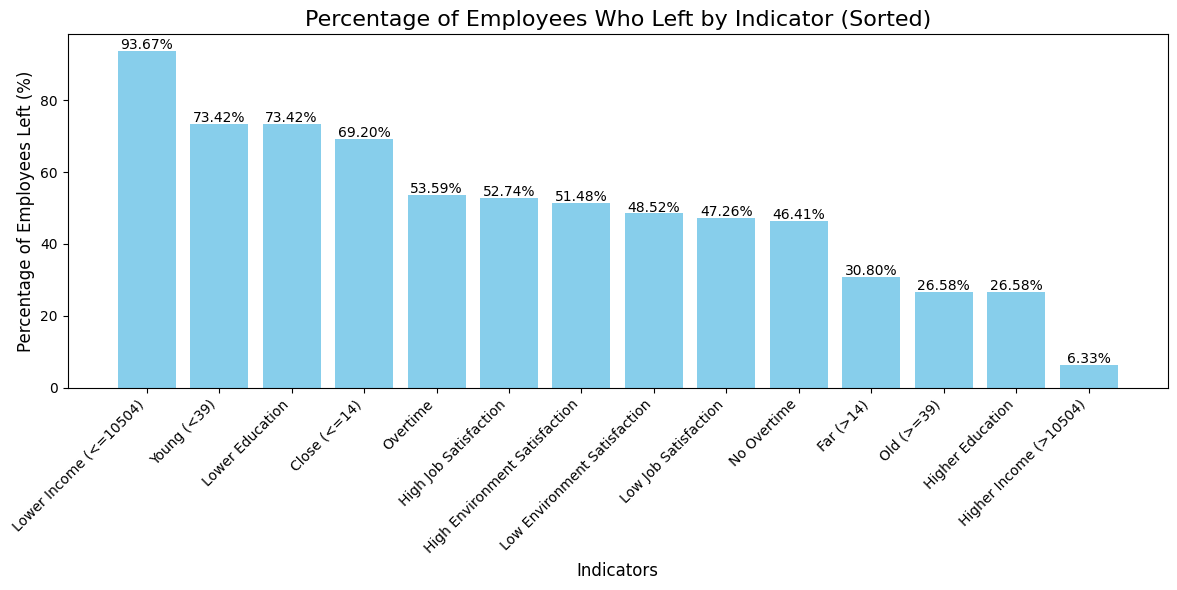

In [474]:
# Indicator labels for the x-axis
indicator_labels = [
    'Young (<39)', 'Old (>=39)', 'Far (>14)', 'Close (<=14)', 
    'Lower Education', 'Higher Education', 
    'Low Job Satisfaction', 'High Job Satisfaction', 
    'Low Environment Satisfaction', 'High Environment Satisfaction', 
    'Higher Income (>10504)', 'Lower Income (<=10504)', 
    'Overtime', 'No Overtime'
]

# Corresponding percentages for each indicator group
indicator_percentages = [
    young_left_percent, old_left_percent, far_left_percent, close_left_percent, 
    lower_ed_left_percent, higher_ed_left_percent, 
    job_sat_left_percent, job_unsat_left_percent, 
    env_sat_left_percent, env_unsat_left_percent, 
    higher_income_left_percent, lower_income_left_percent, 
    overtime_left_percent, no_overtime_left_percent
]

# Zipping the labels and percentages together and sorting by percentages in descending order
sorted_indicators = sorted(zip(indicator_percentages, indicator_labels), reverse=True)

# Unzipping the sorted pairs into two lists
sorted_percentages, sorted_labels = zip(*sorted_indicators)

# Bar chart with sorted values
plt.figure(figsize=(12, 6))
plt.bar(sorted_labels, sorted_percentages, color='skyblue')

plt.title('Percentage of Employees Who Left by Indicator (Sorted)', fontsize=16)
plt.xlabel('Indicators', fontsize=12)
plt.ylabel('Percentage of Employees Left (%)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding the percentages above each bar
for i, v in enumerate(sorted_percentages):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


According to the graph, people who left the company are young, less educated, and have lower incomes.

Let's check it 

In [475]:
young_unpaid_uneducated_left = df[(df['Age'] < 39) & (df['MonthlyIncome'] <= 10504) & (df['Education'] <= 3) & (df['Attrition'] == 'Yes')].shape[0]
young_unpaid_uneducated_left_per = (young_unpaid_uneducated_left * 100)/num_left
print(f'percentage of young, uneducated, lowerpaid employees from those who left: {young_unpaid_uneducated_left_per:.2f}%')

percentage of young, uneducated, lowerpaid employees from those who left: 54.01%


As we can see, more than half of the employees who left are likely to be young students.

## Correlogram Employee attrition

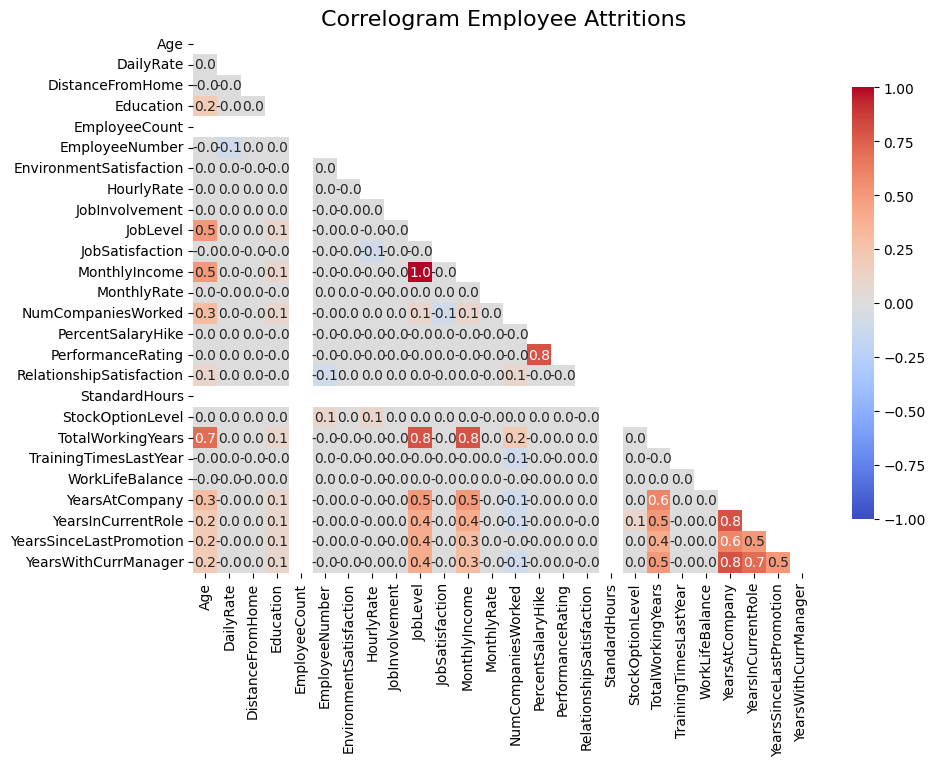

In [476]:
# Setting the size of the plot
plt.figure(figsize=(10, 7))

# Selecting only the numerical columns
df_numerical = df.select_dtypes(include='number')

# Correlation matrix for numerical columns rounded to 1 decimal
corr = df_numerical.corr().round(1)

# Mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting the heatmap
sns.heatmap(corr, 
            mask=mask,            # Mask the upper triangle
            annot=True,           # Correlation coefficients
            fmt='.1f',            # Numbers rounded to 1 decimal place
            cmap='coolwarm',      
            vmin=-1, vmax=1,      # Range of correlation values
            cbar_kws={"shrink": .8} # Shrinking the color bar
           )

plt.title("Correlogram Employee Attritions", fontsize=16)

plt.show()


## Importance of indicators using XGBOOST

In [477]:
import h2o
from h2o.h2o import H2OFrame
from h2o.automl import H2OAutoML
from h2o.estimators import H2OXGBoostEstimator

h2o.init()

# Converting a pandas DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(df)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 17 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,2 months and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_gqfmvw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.497 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [478]:
# Splitting the data into training, validation, and testing sets
split_df = h2o_df.split_frame(ratios=[0.7, 0.15], seed=12)

# Assigning splits to separate variables
h2o_train = split_df[0]
h2o_validation = split_df[1]
h2o_test = split_df[2]

In [479]:
# Defining the features and target
x = h2o_df.columns
y = 'Attrition'  
x.remove(y)

In [480]:
# Initializing the XGBoost model
xgb_model = H2OXGBoostEstimator(
    ntrees=100,
    max_depth=6,
    learn_rate=0.1,
    seed=42
)

In [481]:
# Training the model
xgb_model.train(x=x, y=y, training_frame=h2o_train, validation_frame=h2o_validation)

xgboost Model Build progress: |

/opt/conda/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [StandardHours, EmployeeCount, Over18]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1726730690766_334


Model Summary: 
    number_of_trees
--  -----------------
    100

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0035211219645721087
RMSE: 0.059339042497938144
LogLoss: 0.038283485407684135
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6529555916786194
       No    Yes    Error    Rate
-----  ----  -----  -------  ------------
No     874   0      0        (0.0/874.0)
Yes    0     168    0        (0.0/168.0)
Total  874   168    0        (0.0/1042.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.652956     1         139
max f2                       0.652956     1         139
max f0point5                 0.652956     1         139
max accuracy                 0.652956     1         139
max precision                0.994079     1         0
max recall                   0.652956     1         139
max specificity              0.994079     1         0
max absolute_mcc             0.652956     1         139
max min_per_class_accuracy   0.652956     1         139
max mean_per_class_accuracy  0.652956     1         139
max tns                      0.994079     874       0
max fns                      0.994079     167       0
max fps                      0.000912401  874       399
max tps                      0.652956     168       139
max tnr                      0.994079     1         0
max fnr                      0.994079     0.994048  0
max fpr                      0.000912401  1         399
max tpr                      0.652956     1         139

Gains/Lift Table: Avg response rate: 16.12 %, avg score: 16.12 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0105566                   0.970891           6.20238  6.20238            1                0.979838    1                           0.979838            0.0654762       0.0654762                  520.238  520.238            0.0654762
2        0.0201536                   0.957298           6.20238  6.20238            1                0.962941    1                           0.971792            0.0595238       0.125                      520.238  520.238            0.125
3        0.0307102                   0.944101           6.20238  6.20238            1                0.949546    1                           0.964145            0.0654762       0.190476                   520.238  520.238            0.190476
4        0.0403071                   0.937361           6.20238  6.20238            1                0.940051    1                           0.958408            0.0595238       0.25                       520.238  520.238            0.25
5        0.0508637                   0.929592           6.20238  6.20238            1                0.93322     1                           0.95318             0.0654762       0.315476                   520.238  520.238            0.315476
6        0.100768                    0.875822           6.20238  6.20238            1                0.902647    1                           0.928154            0.309524        0.625                      520.238  520.238            0.625
7        0.150672                    0.782309           6.20238  6.20238            1                0.837427    1                           0.898104            0.3095

In [482]:
# Get feature importances
importances = xgb_model.varimp()

In [483]:
# Converting the list of tuples to a pandas DataFrame
importances_df = pd.DataFrame(importances, columns=['variable', 'relative_importance', 'scale_pos_weight', 'mean_gain'])

# Dropping unnecessary columns
importances_df = importances_df[['variable', 'relative_importance']]

# Sortin the DataFrame by 'relative_importance'
importances_df = importances_df.sort_values(by='relative_importance', ascending=False)

# print(importances_df)

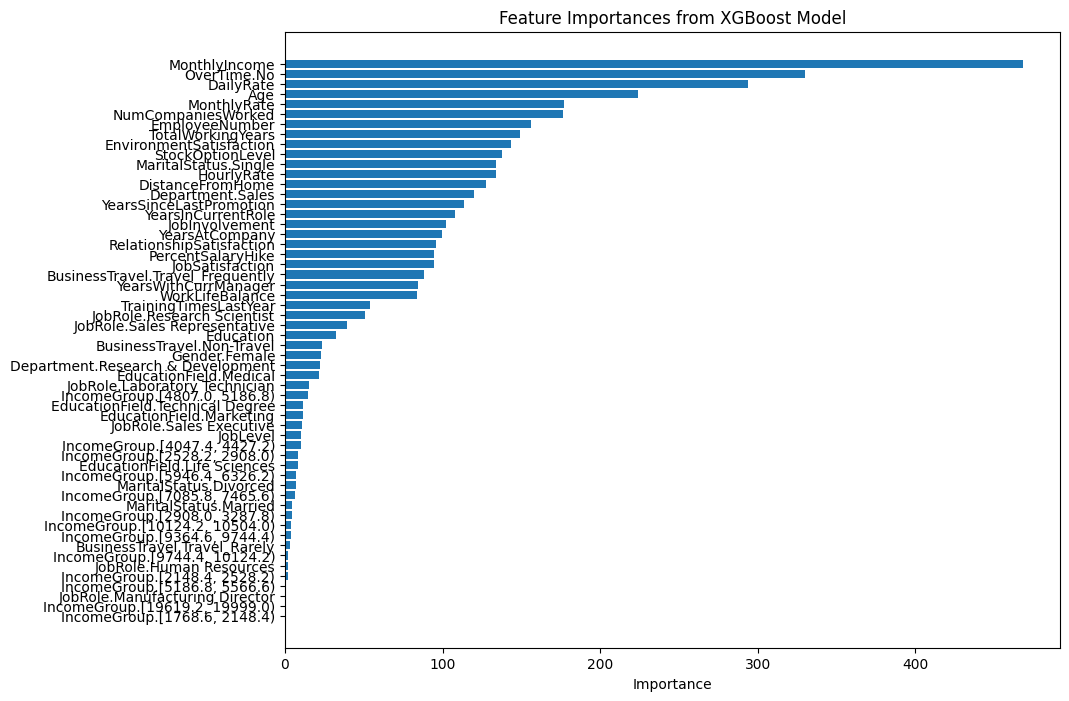

In [484]:
plt.figure(figsize=(10, 8))
plt.barh(importances_df['variable'], importances_df['relative_importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost Model')
plt.gca().invert_yaxis()
plt.show()

### RESULT

As we can see the highest attrituin is caused by
- salary (as expected)
- absence of overtime (which was very unexpected), as it is natural for employees who want to work less. This may be due to the fact that the company does not offer additional working hours, which could provide employees with a bit more income. 
- Daily rate, as an important indicator of income
- Age, which is one of the most important factors. As observed in the previous analysis, younger employees are more likely to leave the company

### Recomendation for the company 
Based on the results, to improve the attrition situation, the employer should raise employee income. It is likely that many of the employees are young students or recent university graduates who are undereducated but full of energy and passion for work. Allowing them to work extra hours and earn additional money could address the four most important factors that contribute to employee attrition.


# PREDICTION OF ATTRITION ML


In [485]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,"[5946.4, 6326.2)"


## Cleaning 

Columns, we don't need
- EmployeeCount
- EmployeeNumber
- Over18

In [486]:
hours_unique = sorted(df['StandardHours'].unique())
hours_unique

[80]

Since all employees are working 80 hours, there is no need to include this column in the table.

In [487]:
stock_unique = sorted(df['StockOptionLevel'].unique())
stock_unique

[0, 1, 2, 3]

In [488]:
df_ml = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

df_ml.head(1)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,"[5946.4, 6326.2)"


In [489]:
columns = df_ml.columns
print(columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomeGroup'],
      dtype='object')


In [490]:
dummies=pd.get_dummies(df_ml)
dummies

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,"IncomeGroup_[1009.0, 1388.8)","IncomeGroup_[1388.8, 1768.6)","IncomeGroup_[1768.6, 2148.4)","IncomeGroup_[2148.4, 2528.2)","IncomeGroup_[2528.2, 2908.0)","IncomeGroup_[2908.0, 3287.8)","IncomeGroup_[3287.8, 3667.6)","IncomeGroup_[3667.6, 4047.4)","IncomeGroup_[4047.4, 4427.2)","IncomeGroup_[4427.2, 4807.0)","IncomeGroup_[4807.0, 5186.8)","IncomeGroup_[5186.8, 5566.6)","IncomeGroup_[5566.6, 5946.4)","IncomeGroup_[5946.4, 6326.2)","IncomeGroup_[6326.2, 6706.0)","IncomeGroup_[6706.0, 7085.8)","IncomeGroup_[7085.8, 7465.6)","IncomeGroup_[7465.6, 7845.4)","IncomeGroup_[7845.4, 8225.2)","IncomeGroup_[8225.2, 8605.0)","IncomeGroup_[8605.0, 8984.8)","IncomeGroup_[8984.8, 9364.6)","IncomeGroup_[9364.6, 9744.4)","IncomeGroup_[9744.4, 10124.2)","IncomeGroup_[10124.2, 10504.0)","IncomeGroup_[10504.0, 10883.8)","IncomeGroup_[10883.8, 11263.6)","IncomeGroup_[11263.6, 11643.4)","IncomeGroup_[11643.4, 12023.2)","IncomeGroup_[12023.2, 12403.0)","IncomeGroup_[12403.0, 12782.8)","IncomeGroup_[12782.8, 13162.6)","IncomeGroup_[13162.6, 13542.4)","IncomeGroup_[13542.4, 13922.2)","IncomeGroup_[13922.2, 14302.0)","IncomeGroup_[14302.0, 14681.8)","IncomeGroup_[14681.8, 15061.6)","IncomeGroup_[15061.6, 15441.4)","IncomeGroup_[15441.4, 15821.2)","IncomeGroup_[15821.2, 16201.0)","IncomeGroup_[16201.0, 16580.8)","IncomeGroup_[16580.8, 16960.6)","IncomeGroup_[16960.6, 17340.4)","IncomeGroup_[17340.4, 17720.2)","IncomeGroup_[17720.2, 18100.0)","IncomeGroup_[18100.0, 18479.8)","IncomeGroup_[18479.8, 18859.6)","IncomeGroup_[18859.6, 19239.4)","IncomeGroup_[19239.4, 19619.2)","IncomeGroup_[19619.2, 19999.0)"
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,T

In [491]:
columns_dummies = dummies.columns

print(columns_dummies)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome',
       ...
       'IncomeGroup_[16201.0, 16580.8)', 'IncomeGroup_[16580.8, 16960.6)',
       'IncomeGroup_[16960.6, 17340.4)', 'IncomeGroup_[17340.4, 17720.2)',
       'IncomeGroup_[17720.2, 18100.0)', 'IncomeGroup_[18100.0, 18479.8)',
       'IncomeGroup_[18479.8, 18859.6)', 'IncomeGroup_[18859.6, 19239.4)',
       'IncomeGroup_[19239.4, 19619.2)', 'IncomeGroup_[19619.2, 19999.0)'],
      dtype='object', length=103)


## ML Model

In [492]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [493]:
features=dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes']]


In [494]:
X=features.values
y=dummies[['Attrition_Yes']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.890
Test Model accruracy scores: 0.894
--------------------------------------------------------------------------


## Checking the accuracy manualy 

In [495]:
# Getting the first 10 rows from the original dataframe `df`
first_10_rows = df.head(10)

# Same preprocessing to these rows (creating dummies)
first_10_rows_dummies = pd.get_dummies(first_10_rows)

# Ensure the columns are aligned with the training data
first_10_rows_dummies = first_10_rows_dummies.reindex(columns=features.columns, fill_value=0)

# Converting to numpy array for prediction
X_first_10 = first_10_rows_dummies.values

# Making predictions
predictions = log_reg.predict(X_first_10)

# Printing the result for each of the 10 employees
print('Prediction results for the first 10 employees:')
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f'Employee {i+1}: Will leave the company (Attrition = Yes)')
    else:
        print(f'Employee {i+1}: Will stay with the company (Attrition = No)')


Prediction results for the first 10 employees:
Employee 1: Will leave the company (Attrition = Yes)
Employee 2: Will stay with the company (Attrition = No)
Employee 3: Will leave the company (Attrition = Yes)
Employee 4: Will stay with the company (Attrition = No)
Employee 5: Will stay with the company (Attrition = No)
Employee 6: Will stay with the company (Attrition = No)
Employee 7: Will stay with the company (Attrition = No)
Employee 8: Will stay with the company (Attrition = No)
Employee 9: Will stay with the company (Attrition = No)
Employee 10: Will stay with the company (Attrition = No)


In [496]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,"[5946.4, 6326.2)"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,"[4807.0, 5186.8)"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,"[1768.6, 2148.4)"
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,"[2908.0, 3287.8)"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,"[3287.8, 3667.6)"
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,"[2908.0, 3287.8)"
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,"[2528.2, 2908.0)"
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,"[2528.2, 2908.0)"
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,"[9364.6, 9744.4)"
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,"[5186.8, 5566.6)"
